# <span style="color:#827F73"><center>Analyzing Twitter Data: We Rate Dogs</center></span>

# Introduction

## The purpose of this report is to share results produced from the wrangled data. This project will communicate the insights and display visualizations of the wrangled twitter data.

## 1. Word Cloud<a id='5.1'></a>

> Word Cloud is an image composed of words used in a particular text or subject, in which the size of each word indicates its frequency or importance. **Definition by Google**

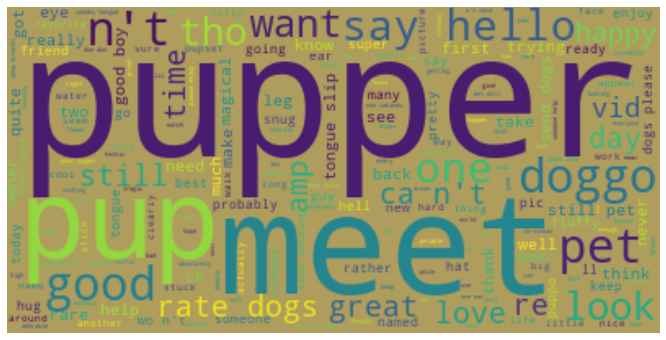

In [36]:
#import wordcloud
from wordcloud import WordCloud

#combine text column in one single text
text = ' '.join((n for n in list(twitt_arch.text.str.lower())))
text_tokenized = word_tokenize(text)
#remove stop words like the, he, she, etc...
text_no_stop_words = [x for x in text_tokenized if x not in stop_words.union({'would', 'af', 'dog', 'ckin', 'rt', 'dog_rates'})]
#create the actual wordcloud object, 
cloud = WordCloud(background_color='#AF9D5D').generate(' '.join(n for n in text_no_stop_words))


#plot the word cloud image for  A4 (portrait)
plt.figure(figsize = [11.69, 8.27])
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off');

### Plotting the Word Cloud shows words like `pupper, pup, meet, pet, and doggo appears most in the tweets.` So, among all dog stages it seems to be pupper is the most popular one or at least it’s the most stage that have highest number of tweets.

## 2. Page Popularity<a id='5.2'></a>

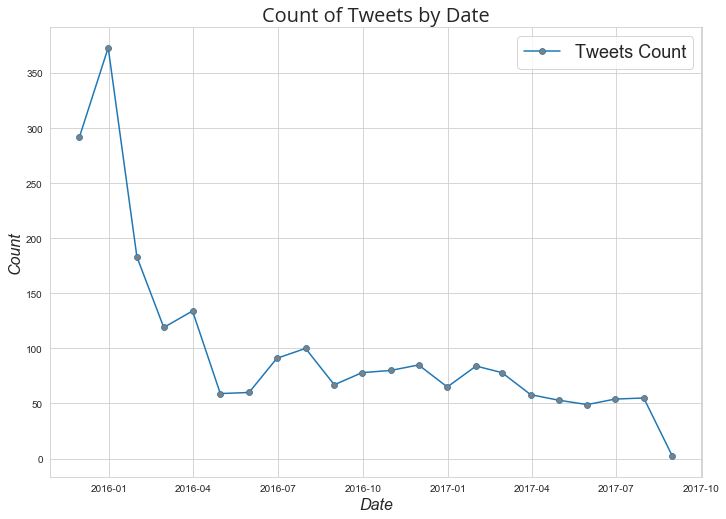

In [37]:
#set the timestamp to datetime object
twitt_arch.timestamp = pd.to_datetime(twitt_arch.timestamp)
data = twitt_arch
data.set_index('timestamp', inplace = True)
data = data.sort_index()
#resample the data by month and create the count of tweets in each month using the .size() method
data = data.resample('M').size()

#change the plotting syle
sns.set_style('whitegrid')
plt.figure(figsize = [11.69, 8.27])

#create a line plot of tweets count by date
ax = sns.lineplot(data=data, label = 'Tweets Count', marker = 'o', markerfacecolor = 'grey', markeredgecolor = None, hue = 'dog_stage')
ax.set_xlabel('Date', style='italic', size = 16)
ax.set_ylabel('Count', style='italic', size = 16)
ax.set_title('Count of Tweets by Date', style='italic', size = 20, fontname = 'Open Sans')
plt.legend(fontsize = 18);

### The popularity of @dog_rates peaked in early 2016 as the count of tweets was more than 350 for the queried tweets in a single month, then it started to decline until early 2017 to reach its lowest levels.

### It is obvious that the page was so popular in its early stages.

## 3. Rating and Dog Stage Heatmap<a id='5.3'></a>

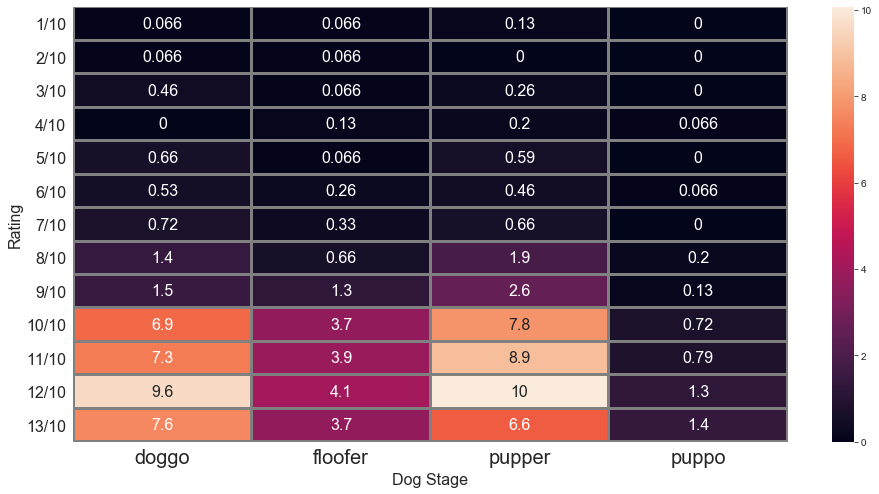

In [38]:
#create ordered category from the rating_numerator and rating_denominator columns
twitt_arch['rating'] = twitt_arch.rating_numerator.astype(str) + '/' + twitt_arch.rating_denominator.astype(str)
rating_order = ['1/10', '2/10', '3/10', '4/10', '5/10', '6/10', '7/10', '8/10', '9/10', '10/10', '11/10', '12/10', '13/10']
order = pd.api.types.CategoricalDtype(rating_order, ordered=True)
twitt_arch['rating'] = twitt_arch['rating'].astype(order)

#plot the count normalized heatmap of the dog_type vs the rating
plt.figure(figsize = (16, 8))
sns.heatmap((pd.crosstab(twitt_arch['rating'], twitt_arch['dog_stage'], normalize=True)*100), annot = True, linewidths = 2, linecolor='grey', annot_kws=dict(fontsize = 16))
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 16, rotation = 0)
plt.xlabel('Dog Stage', fontsize = 16)
plt.ylabel('Rating', fontsize = 16);

### This heat map show an interesting pattern in the distribution of the `tweet count percentage between dog stage and rating`, where the most popular dog stage is pupper that have high rating values followed by doggo, then floofer and lastly puppo where almost 3% of tweets contains the keyword puppo.

### `Perhaps the most debatable dog type is the pupper and doggo.`

## 4. Proportion of Predictions that are Actual Dogs<a id='5.4'></a>

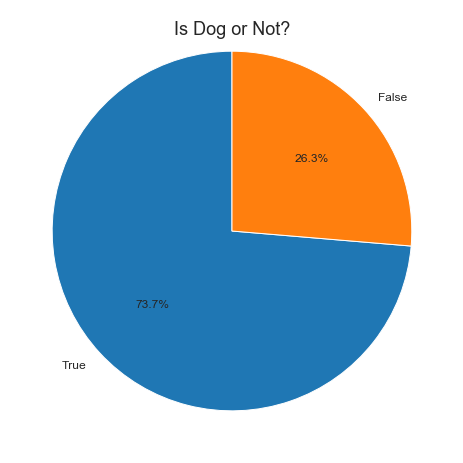

In [39]:
plt.figure(figsize = [11.69, 8.27])

#query data for the top prediction
data = img_pred.query('p_rank == 1').is_dog.value_counts()
#construct a pie plot
plt.pie(data, labels= data.index, autopct='%1.1f%%', startangle=90, textprops = dict(fontsize = 12))
plt.title('Is Dog or Not?', fontsize = 18, y = .925);

### More than `25% of the predicted dogs breeds are not an actual dogs`(img_pred dataframe).

### Despite the fact that the page is for dog rating, `25% of sampled tweets have media content that is not related to dogs.`

## 5. Conclusion<a id='5.5.2'></a>

> Visualize multiple variables with the rating</br>

> `Sentiment Score` is created using `Sentiment Intensity Analyzer`, where `-1 represents the most negative sentiment` of a tweet and `+1 represents the most positive sentiment` of a tweet and `0 is neural.`

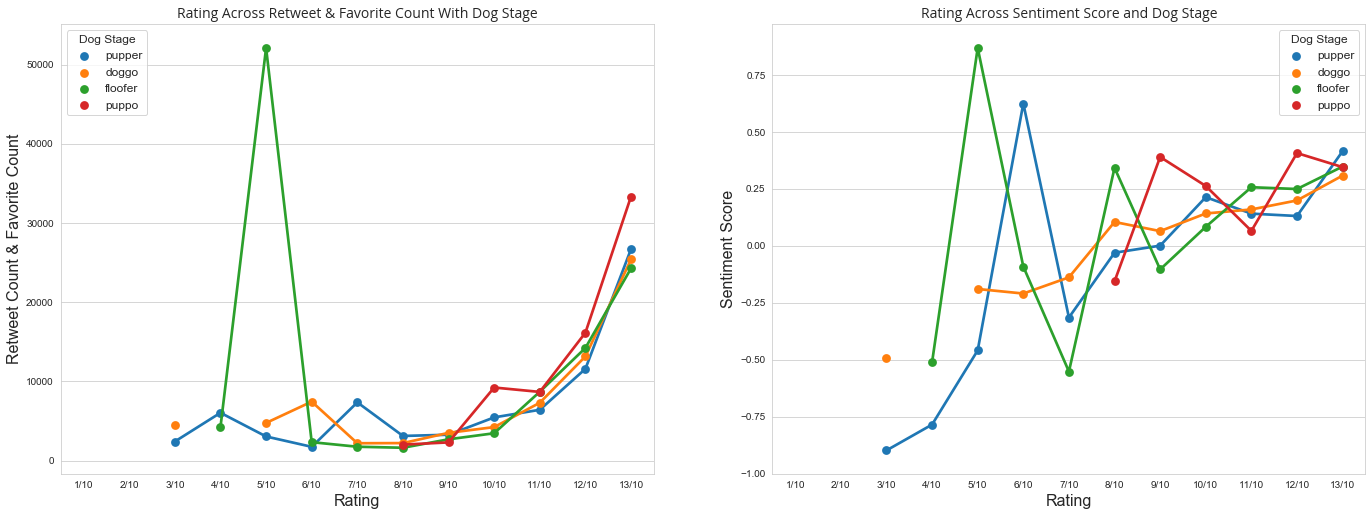

In [42]:
figure, ax = plt.subplots(1, 2, figsize=[11.69*2, 8.27])

#create a rating column
combined['rating'] = combined.rating_numerator.astype(str) + '/' + combined.rating_denominator.astype(str)
order = pd.api.types.CategoricalDtype(rating_order, ordered=True)
combined['rating'] = combined['rating'].astype(order)
#add the retweet_count with the favorite_count 
combined['retweet_favorite_count'] = combined.retweet_count.add(combined.favorite_count)

#Create point plot of Rating Across Retweet & Favorite Count With Dog Stage
ax[0] = sns.pointplot(data  = combined, x = 'rating', y = 'retweet_favorite_count', hue = 'dog_stage', errwidth=0, ax = ax[0])
ax[0].set_xlabel('Rating', fontsize = 16)
ax[0].set_ylabel('Retweet Count & Favorite Count', fontsize = 16)
ax[0].legend(title = 'Dog Stage', fontsize = 12, title_fontsize = 12)
ax[0].set_title('Rating Across Retweet & Favorite Count With Dog Stage', style='italic', size = 14, fontname = 'Open Sans')

#Create a point plot of Rating Across Sentiment Score and Dog Stage
ax[1] = sns.pointplot(data  = combined, x = 'rating', y = 'sentiment_score', hue = 'dog_stage', errwidth=0, ax = ax[1])
ax[1].set_xlabel('Rating', fontsize = 16)
ax[1].set_ylabel('Sentiment Score', fontsize = 16)
ax[1].legend(title = 'Dog Stage', fontsize = 12, title_fontsize = 12)
ax[1].set_title('Rating Across Sentiment Score and Dog Stage', style='italic', size = 14, fontname = 'Open Sans');

## `Rating Across Retweet & Favorite Count With Dog Stage`

### Retweet Count + Favorite Count starts to increase exponetially for rating above 9/10.

### Despite that fact the puppo have the lowest portion of tweets (refer to heatmap above), but it have the highest median distribution of rating between all dog stages and the highest median retweet count + favorite count at all ratings. Also the lowest median rating for the puppo dog stage is 8/10.

## `Rating Across Sentiment Score and Dog Stage`

### Sentiment of tweet increases as the rating increase.

### The Median of the tweets sentiment is always positive for rating above 10/10, with some dog stages have higher sentiment than the others for a certain rating scores.

> ## As a Conclusion the Most debatable dog stage is doggo as it appears in most tweets, and the highest rated dog stage is puppo. On the other side the popularity of the page decreased significantly by time as shown by the number of tweets.